In [3]:
import glob
import os
import re

import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# --- FUNCTION to preprocess .txt files for consistent delimiters


def preprocess_txt(file_path):
    data = []  # Initialize a list to store the processed data

    # Initialize a flag to determine if we are reading the header
    is_header = True

    # Read the file line by line and process the data
    with open(file_path) as file:
        for line in file:
            line = line.strip()  # Remove leading/trailing whitespace
            if is_header:
                # Split the first line into column names
                column_names = re.split(r"\s+", line)
                is_header = False
            else:
                # Split the other lines into data values
                values = re.split(r"\s+", line)
                data.append(values)

    # Create a DataFrame with the processed data and set column names
    df = pd.DataFrame(data, columns=column_names)
    # return
    return df

In [5]:
# --- read in flux data
# flux data are colum integrated fluxes with all timesteps in a single file


# where results are stored
results_path = "example_3-3-calcite_site8"
flx_path, prof_path = os.path.join(results_path, "flx"), os.path.join(
    results_path, "prof"
)

# define file name pattern
fn_pref = [
    "int_flx_sld",
    "flx_sld",
]  # will read in all species unless fn_varInclude is defined
fn_varInclude = ["cc", "an"]
varCheck = True if len(fn_varInclude) > 0 else False
fn_ext = ".txt"

# loop through variables
df = pd.DataFrame()  # initialize empty df to store dat
for fset in fn_pref:
    # set pattern
    fn_pattern = f"{fset}-*{fn_ext}"
    # get list of filenames
    file_paths = glob.glob(f"{flx_path}/{fn_pattern}")

    # read in data and concatenate
    for file_path in file_paths:
        # get the variable
        varpattern = re.escape(fset) + r"-(.*?).txt"
        varmatch = re.search(varpattern, file_path)
        var = varmatch.group(1)
        # skip this step if it's not in the include arr
        if varCheck:
            if var not in fn_varInclude:
                continue
        # read in
        dfi = preprocess_txt(file_path)
        # apply pd.to_numeric to all columns using the "map" method
        dfi = dfi.map(pd.to_numeric)
        # add set and var
        dfi["set"] = fset
        dfi["var"] = var
        # combine
        df = pd.concat([df, dfi], ignore_index=True)

# sort by time and depth
df = df.sort_values(by=["var", "time"])
df

,time,tflx,adv,dif,rain,amsi,cc,dlm,tm,ka,...,ab,g2,fo,an,fa,gt,fe2o2,res,set,var
0,0.001111,-1.445043e-18,1.801866e-21,-9.566854e-36,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.443241e-18,0.0,0.0,0.0,-6.992464e-30,int_flx_sld,an
128,0.001111,-1.444976e-18,1.801848e-21,-2.567945e-35,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.443174e-18,0.0,0.0,0.0,-7.063220e-31,flx_sld,an
1,0.012111,-1.442959e-18,1.801329e-21,-2.129087e-34,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.441158e-18,0.0,0.0,0.0,-7.163843e-31,int_flx_sld,an
129,0.012111,-1.442557e-18,1.801113e-21,-2.824722e-34,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.440756e-18,0.0,0.0,0.0,-4.104799e-32,flx_sld,an
2,0.027801,-1.441447e-18,1.806265e-21,-2.666624e-34,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.439640e-18,0.0,0.0,0.0,-3.289883e-31,int_flx_sld,an
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,110.094646,1.044925e+01,2.783782e+01,-3.486100e-14,-39.964432,0.0,1.677357,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,5.960465e-11,flx_sld,cc
126,115.195414,1.806822e+01,2.041415e+01,-3.935885e-15,-39.964432,0.0,1.482059,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,-5.294470e-11,int_flx_sld,cc
254,115.195414,1.016982e+01,2.811018e+01,-3.663736e-14,-39.964432,0.0,1.684433,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,7.253877e-11,flx_sld,cc
127,120.296181,1.772733e+01,2.074631e+01,-4.140892e-15,-39.964432,0.0,1.490793,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,-6.250963e-11,int_flx_sld,cc


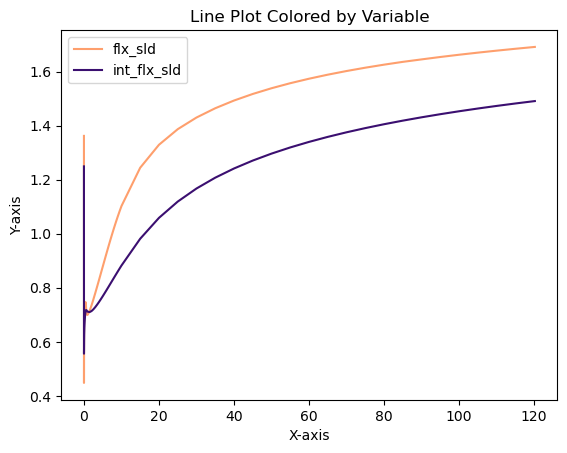

In [6]:
# --- plot single flux (lines colored by the set)
pvar = "cc"  # variable to plot
pfluxtype = "cc"  # column name to plot (usually dif or adv)

# aesthetics
mycmap = "magma"  # name of colormap
# cmap start and end percentages
start_percentage = 0.2
end_percentage = 0.8

# plot prep
dfx = df[df["var"] == pvar]
grouped = dfx.groupby("set")
num_sets = len(grouped)
# colormap
cmap = plt.get_cmap(mycmap)  # Get the colormap
cmap = cmap.reversed()  # flip colormap
# -- no log normalization
norm = plt.Normalize(
    df["time"].min(), df["time"].max()
)  # Normalize time values for colormap


# --- PLOT
# Create a plot for each time step
for i, (name, group) in enumerate(grouped):
    cmap_percentage = start_percentage + i * (end_percentage - start_percentage) / (
        num_sets - 1
    )
    color = cmap(cmap_percentage)
    plt.plot(group["time"], group[pfluxtype], color=color, label=name)
    # plt.plot(group['gt'], group['z'], color=color, linestyle='dashed', label=None)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Line Plot Colored by Variable")
# Add legend
plt.legend()
plt.show();

(-42.0, -38.0)

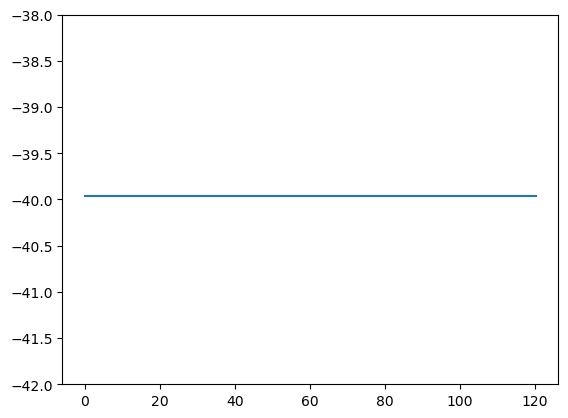

In [17]:
plt.plot(dfx["time"], dfx["rain"])
plt.ylim([-42, -38])

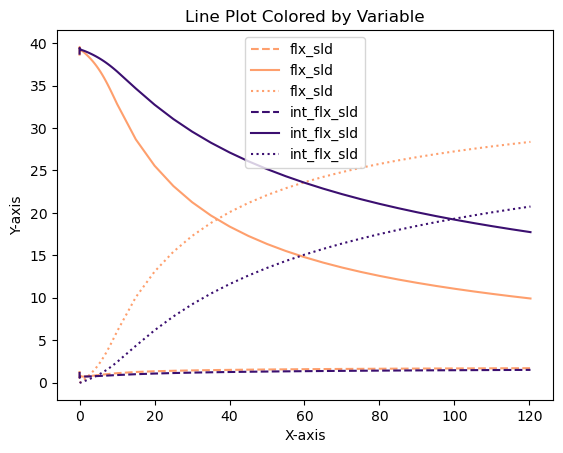

In [7]:
# --- plot multi flux (lines colored by the set)
pvar = "cc"  # variable to plot
pfluxtype1 = "cc"  # column name to plot (usually dif or adv)
pfluxtype2 = "tflx"
pfluxtype3 = "adv"

# aesthetics
mycmap = "magma"  # name of colormap
# cmap start and end percentages
start_percentage = 0.2
end_percentage = 0.8

# plot prep
dfx = df[df["var"] == pvar]
grouped = dfx.groupby("set")
num_sets = len(grouped)
# colormap
cmap = plt.get_cmap(mycmap)  # Get the colormap
cmap = cmap.reversed()  # flip colormap
# -- no log normalization
norm = plt.Normalize(
    df["time"].min(), df["time"].max()
)  # Normalize time values for colormap


# --- PLOT
# Create a plot for each time step
for i, (name, group) in enumerate(grouped):
    cmap_percentage = start_percentage + i * (end_percentage - start_percentage) / (
        num_sets - 1
    )
    color = cmap(cmap_percentage)
    plt.plot(
        group["time"], group[pfluxtype1], color=color, label=name, linestyle="dashed"
    )
    plt.plot(
        group["time"], group[pfluxtype2], color=color, label=name, linestyle="solid"
    )
    plt.plot(
        group["time"], group[pfluxtype3], color=color, label=name, linestyle="dotted"
    )
    # plt.plot(group['gt'], group['z'], color=color, linestyle='dashed', label=None)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Line Plot Colored by Variable")
# Add legend
plt.legend()
plt.show();

In [59]:
# --- compute CDR following Kanzaki / Baek (not accounting for respiration change here because T is held constant)
difcol, advcol = "dif_co2g_change", "adv_DIC_change"
difvar, advvar = "co2g", "DIC"
adv_lossFactor = 0  # fraction of advected C that we lose (Baek et al., 2023 use 0.14)

# loop through sets
outdf = pd.DataFrame()  # initialize empty df to store dat
for dset in pd.unique(df["set"]):
    # subset data
    dif_cond = (df["set"] == dset) & (df["var"] == difvar)
    adv_cond = (df["set"] == dset) & (df["var"] == advvar)
    # create output df
    dif_df = df.loc[dif_cond, ["time", difcol]]
    adv_df = df.loc[adv_cond, ["time", advcol]]
    outdf_i = pd.merge(dif_df, adv_df, on="time", how="outer")
    # compute cdr
    outdf_i["cdr_mol_m2_yr"] = -1 * outdf_i[difcol] + outdf_i[advcol] * (
        1 - adv_lossFactor
    )
    # add set
    outdf_i["set"] = dset
    # get output dataset
    outdf = pd.concat([outdf, outdf_i], ignore_index=True)

# convert to tons / ha / yr
co2_g_mol = 44.01
ton_g = 1 / 1e6
m2_ha = 10e3
outdf["cdr_ton_ha_yr"] = outdf["cdr_mol_m2_yr"] * co2_g_mol * ton_g * m2_ha

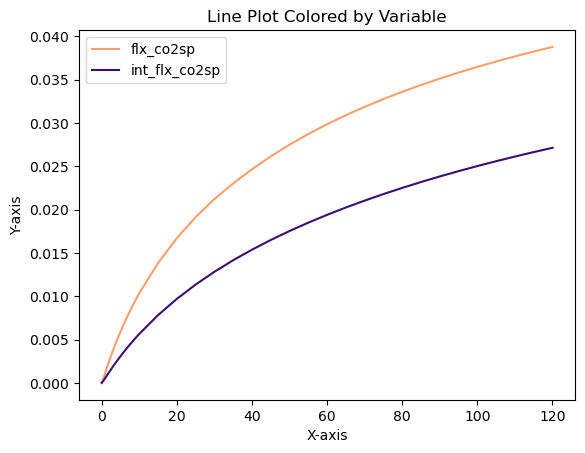

In [60]:
# --- plot CDR (lines colored by the set)
cdvar = "cdr_ton_ha_yr"  # variable to plot

# aesthetics
logX = False
logY = False
mycmap = "magma"  # name of colormap
# cmap start and end percentages
start_percentage = 0.2
end_percentage = 0.8

# plot prep
grouped = outdf.groupby("set")
num_sets = len(grouped)
# colormap
cmap = plt.get_cmap(mycmap)  # Get the colormap
cmap = cmap.reversed()  # flip colormap
# -- no log normalization
norm = plt.Normalize(
    df["time"].min(), df["time"].max()
)  # Normalize time values for colormap


# --- PLOT
# Create a plot for each time step
for i, (name, group) in enumerate(grouped):
    cmap_percentage = start_percentage + i * (end_percentage - start_percentage) / (
        num_sets - 1
    )
    color = cmap(cmap_percentage)
    plt.plot(group["time"], group[cdvar], color=color, label=name)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
if logX:
    plt.xscale("log")
    plt.xlim([0.1, 100])
if logY:
    plt.yscale("log")
    plt.ylim([0.0001, 15])
plt.title("Line Plot Colored by Variable")
# Add legend
plt.legend()
plt.show();

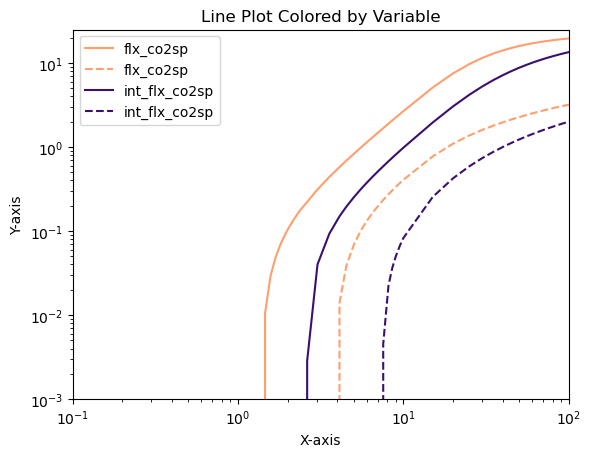

In [41]:
# --- plot individual contributions to CDR
difcol, advcol = "dif_co2g_change", "adv_DIC_change"  # variable to plot
cdvar = "cdr_ton_ha_yr"  # variable to plot

# aesthetics
logX = True
logY = True
mycmap = "magma"  # name of colormap
# cmap start and end percentages
start_percentage = 0.2
end_percentage = 0.8

# plot prep
grouped = outdf.groupby("set")
num_sets = len(grouped)
# colormap
cmap = plt.get_cmap(mycmap)  # Get the colormap
cmap = cmap.reversed()  # flip colormap
# -- no log normalization
norm = plt.Normalize(
    df["time"].min(), df["time"].max()
)  # Normalize time values for colormap


# --- PLOT
# Create a plot for each time step
for i, (name, group) in enumerate(grouped):
    cmap_percentage = start_percentage + i * (end_percentage - start_percentage) / (
        num_sets - 1
    )
    color = cmap(cmap_percentage)
    plt.plot(group["time"], group[difcol] * -1, color=color, label=name, linestyle="-")
    plt.plot(
        group["time"],
        group[advcol] * (1 - adv_lossFactor),
        color=color,
        label=name,
        linestyle="--",
    )


# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
if logX:
    plt.xscale("log")
    plt.xlim([0.1, 100])
if logY:
    plt.yscale("log")
    plt.ylim([0.001, 25])
plt.title("Line Plot Colored by Variable")
# Add legend
plt.legend()
plt.show();

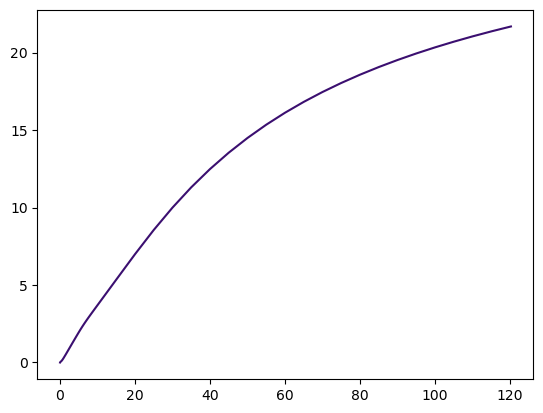

In [171]:
plt.plot(group["time"], group[cdvar], color=color, label=name)

In [170]:
group

,time,dif_co2g_change,adv_DIC_change,cdr_mol_m2_yr,set,cdr_ton_ha_yr
0,0.001111,0.000000,0.000000e+00,0.000000,int_flx_co2sp,0.000000
1,0.003026,-0.002024,9.777405e-07,0.002025,int_flx_co2sp,0.000891
2,0.010069,-0.005748,2.196623e-05,0.005770,int_flx_co2sp,0.002540
3,0.030576,-0.012755,1.611817e-04,0.012916,int_flx_co2sp,0.005684
4,0.050194,-0.017698,3.304539e-04,0.018028,int_flx_co2sp,0.007934
...,...,...,...,...,...,...
59,100.028801,-16.360641,3.978193e+00,20.338834,int_flx_co2sp,8.951121
60,105.019451,-16.667042,4.037652e+00,20.704693,int_flx_co2sp,9.112135
61,110.010101,-16.953145,4.094122e+00,21.047267,int_flx_co2sp,9.262902
62,115.271717,-17.235073,4.150706e+00,21.385780,int_flx_co2sp,9.411882


In [135]:
# subset data
pvar = "co2g"
colname = "dif_" + pvar + "_change"
df[colname] = 0.0

cond = (df["set"] == "int_flx_co2sp") & (df["var"] == "co2g")
dfx = df[cond]
# get initial flux
diff_init = dfx.loc[dfx["time"].idxmin(), "dif"]
# fill in new column
df.loc[cond, colname] = df.loc[cond, "dif"] - diff_init
df.loc[cond, colname]

0      0.000000
1     -0.002024
2     -0.005748
3     -0.012755
4     -0.017698
        ...    
59   -16.360641
60   -16.667042
61   -16.953145
62   -17.235073
63   -17.487820
Name: dif_co2g_change, Length: 64, dtype: float64